<function matplotlib.pyplot.show(close=None, block=None)>

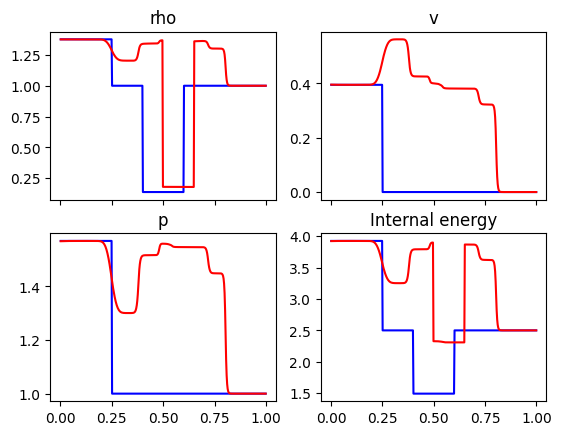

In [18]:
import matplotlib.pyplot as plt
import numpy as np

file = open("output.dat", "r")
output = file.read()
output = output.split("\n")
#print(output)
i = 0
initial_values = []
while (output[i] != "\t"):
    #output[i] = output[i].split()
    if (output[i] != ""):
        initial_values.append(output[i].split())
    i += 1
i += 1
final_values = []
while (i < len(output)):
    #output[i] = output[i].split()
    if (output[i] != ""):
        final_values.append(output[i].split())
    i += 1
del(output)
del(file)
#print(initial_values)
#print(final_values)
if len(initial_values) != len(final_values):
    print("ERROR!! ", len(initial_values), " != ", len(final_values))
else:
    nPoints = len(initial_values)
    
i = 0
while (i < nPoints):
    for j in range(4):
        initial_values[i][j] = float(initial_values[i][j])
        final_values[i][j] = float(final_values[i][j])
    i += 1

x = []
for i in range(nPoints):
    x.append((2*i+1)/(2*nPoints))
v_initial = []
v_final = []
rho_initial = []
rho_final = []
E_initial = []
E_final = []
p_initial = []
p_final = []
Eint_initial = []
Eint_final = []
level_set_initial = []
level_set_final = []
for i in range(nPoints):
    level_set_initial.append(initial_values[i][0])
    level_set_final.append(final_values[i][0])
    v_initial.append(initial_values[i][2]/initial_values[i][1])
    v_final.append(final_values[i][2]/final_values[i][1])
    rho_initial.append(initial_values[i][1])
    rho_final.append(final_values[i][1])
    E_initial.append(initial_values[i][3])
    E_final.append(final_values[i][3])
    Eint_initial.append(E_initial[i] - 0.5*rho_initial[i]*v_initial[i]*v_initial[i])
    Eint_final.append(E_final[i] - 0.5*rho_final[i]*v_final[i]*v_final[i])
    if level_set_initial[i] <= 0.0:
        p_initial.append(Eint_initial[i]*0.67)
    else:
        p_initial.append(Eint_initial[i]*0.4)
    if level_set_final[i] <= 0.0:
        p_final.append(Eint_final[i]*0.67)
    else:
        p_final.append(Eint_final[i]*0.4)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
axs[0, 0].plot(x, rho_initial, 'b')
axs[0, 0].plot(x, rho_final, 'r')
axs[0, 0].set_title("rho")
axs[0, 1].plot(x, v_initial, 'b')
axs[0, 1].plot(x, v_final, 'r')
axs[0, 1].set_title("v")
axs[1, 0].plot(x, p_initial, 'b')
axs[1, 0].plot(x, p_final, 'r')
axs[1, 0].set_title("p")
axs[1, 1].plot(x, Eint_initial, 'b')
axs[1, 1].plot(x, Eint_final, 'r')
axs[1, 1].set_title("Internal energy")
plt.show